In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [98]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

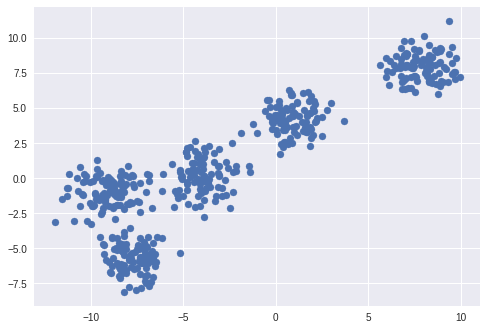

In [99]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [100]:
# clustering of k = 5
clusters = {}
k = 5
colors = ["green","blue","red","yellow","orange"]
for kx in range(k):
    c = 10*(2*np.random.random((2,)) - 1)
    cluster = {
        'center' : [],
        'color'  : colors[kx],
        'points' : []
     }
    
    cluster['center'].append(c)
    clusters[kx] = cluster

In [101]:
print(clusters)

{0: {'center': [array([-9.73541595,  2.51759331])], 'color': 'green', 'points': []}, 1: {'center': [array([ 3.44103373, -3.7137366 ])], 'color': 'blue', 'points': []}, 2: {'center': [array([-6.92239643,  0.41023245])], 'color': 'red', 'points': []}, 3: {'center': [array([-5.13968568,  0.70189203])], 'color': 'yellow', 'points': []}, 4: {'center': [array([-6.36744269, -9.90448297])], 'color': 'orange', 'points': []}}


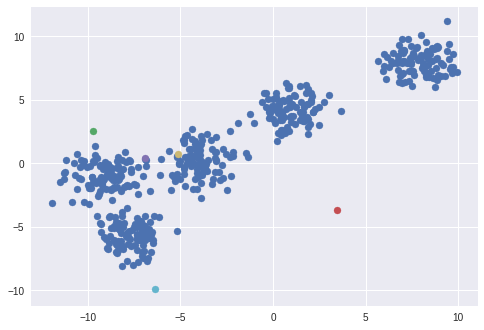

In [102]:
plt.style.use('seaborn')

plt.scatter(X[:,0],X[:,1])
for i in clusters:
    clust = clusters[i]['center']
    plt.scatter(clust[0][0],clust[0][1])
    
plt.show()

In [103]:
def distance(a,b):
    d = np.sum((a-b)**2)
    return np.sqrt(d)

In [104]:
def assignPoints(clusters,X):
    
    for p in range(X.shape[0]):
        curr_pt = X[p]
        dsf = []
        
        for c in range(k):
            dist = distance(curr_pt,clusters[c]['center'])
            dsf.append(dist)
        
        mindist_index = np.argmin(dsf)
        clusters[mindist_index]['points'].append(curr_pt)
    
    return
    

In [105]:
assignPoints(clusters,X)

In [106]:
print(clusters)

{0: {'center': [array([-9.73541595,  2.51759331])], 'color': 'green', 'points': [array([-10.3969262 ,  -0.28827972]), array([-10.22494442,   0.16581105]), array([-11.29535476,  -0.73378326]), array([-10.38104879,   0.26793302]), array([-11.27692543,  -1.2352925 ]), array([-11.52738247,  -1.45276044]), array([-10.46722864,  -1.12606315]), array([-10.2752758 ,  -0.16826591]), array([-10.75491526,   0.01578892]), array([-9.8773221 , -0.17517456]), array([-10.0355668 ,  -0.28143508]), array([-9.63301578,  1.32811375]), array([-10.3928183 ,  -1.20353846]), array([-11.16012981,   0.26756898]), array([-11.94778125,  -3.14233477]), array([-11.2432042 ,  -0.68600013]), array([-9.71913179,  0.18156338]), array([-9.64202715,  0.10740227]), array([-9.48733708,  0.39835963]), array([-10.56023252,   0.76396703]), array([-10.67351631,  -0.94286213]), array([-9.63341735,  0.64589168])]}, 1: {'center': [array([ 3.44103373, -3.7137366 ])], 'color': 'blue', 'points': [array([8.14492336, 7.52724561]), arr

[array([-10.3969262 ,  -0.28827972]), array([-10.22494442,   0.16581105]), array([-11.29535476,  -0.73378326]), array([-10.38104879,   0.26793302]), array([-11.27692543,  -1.2352925 ]), array([-11.52738247,  -1.45276044]), array([-10.46722864,  -1.12606315]), array([-10.2752758 ,  -0.16826591]), array([-10.75491526,   0.01578892]), array([-9.8773221 , -0.17517456]), array([-10.0355668 ,  -0.28143508]), array([-9.63301578,  1.32811375]), array([-10.3928183 ,  -1.20353846]), array([-11.16012981,   0.26756898]), array([-11.94778125,  -3.14233477]), array([-11.2432042 ,  -0.68600013]), array([-9.71913179,  0.18156338]), array([-9.64202715,  0.10740227]), array([-9.48733708,  0.39835963]), array([-10.56023252,   0.76396703]), array([-10.67351631,  -0.94286213]), array([-9.63341735,  0.64589168])]
[array([8.14492336, 7.52724561]), array([7.44598269, 9.20313614]), array([8.73872704, 5.97009465]), array([8.84851188, 9.26501008]), array([8.27287322, 6.92062212]), array([6.96905011, 6.3449164 ])

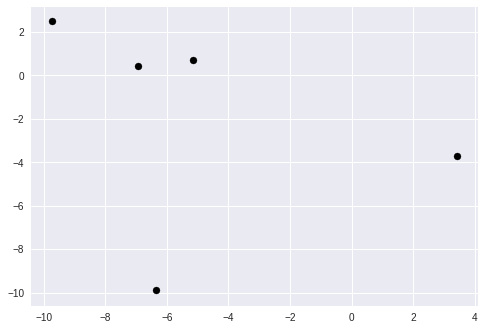

In [107]:
import time

start = time.time()
for clust in range(k):
    c = clusters[clust]['points']
    
    print(c)
    
    cent = np.array(clusters[clust]['center'])
    plt.scatter(cent[0][0],cent[0][1],c="black")

end = time.time()
print(end - start)

In [108]:
def updateCluster(clusters):
    
    for i in range(k): 
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0] > 0:
            ncenter = pts.mean(axis=0)
            clusters[i]['center'] = ncenter
            clusters[i]['points'] = []
    
    return


In [109]:
def assignPoints(clusters,X):
    
    for p in range(X.shape[0]):
        curr_pt = X[p]
        dsf = []
        
        for c in range(k):
            dist = distance(curr_pt,clusters[c]['center'])
            dsf.append(dist)
        
        mindist_index = np.argmin(dsf)
        clusters[mindist_index]['points'].append(curr_pt)
    
    return

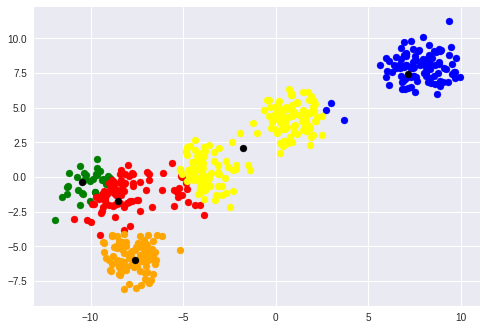

In [114]:
def plotCluster(clusters):
    for clust in range(k):
        pts = clusters[clust]['points']
        pts = np.array(pts)
    
        clr = clusters[clust]['color']
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        except:
            pass
        cent = np.array(clusters[clust]['center'])
        plt.scatter(cent[0],cent[1],c='black')
    
#updateCluster(clusters)
plotCluster(clusters)

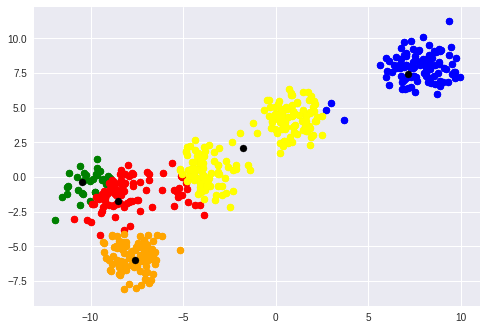

In [115]:
assignPoints(clusters,X)
plotCluster(clusters)
updateCluster(clusters)

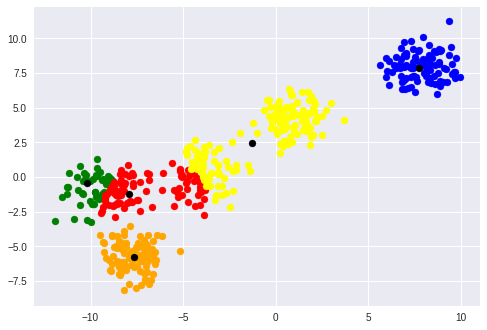

In [117]:
assignPoints(clusters,X)
plotCluster(clusters)
updateCluster(clusters)

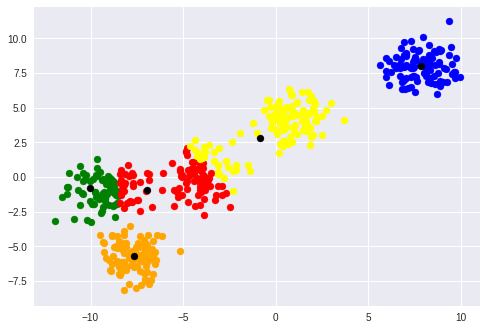

In [118]:
assignPoints(clusters,X)
plotCluster(clusters)
updateCluster(clusters)

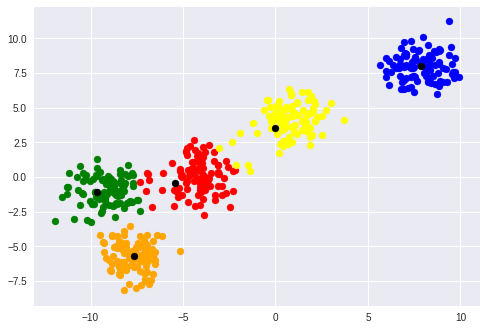

In [119]:
assignPoints(clusters,X)
plotCluster(clusters)
updateCluster(clusters)

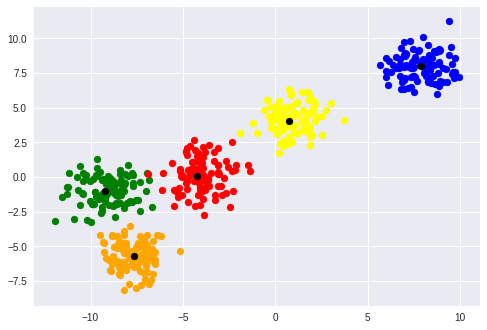

In [120]:
assignPoints(clusters,X)
plotCluster(clusters)
updateCluster(clusters)

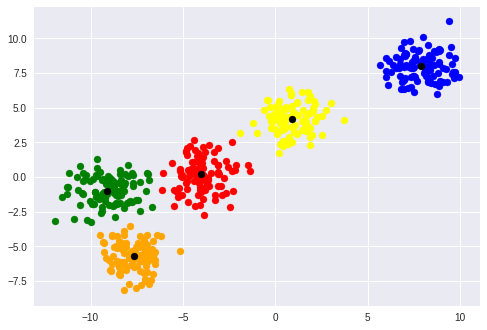

In [121]:
assignPoints(clusters,X)
plotCluster(clusters)
updateCluster(clusters)